# Student Performance Indicator
## Life cycle of a Machine Learning Project

- understanding the problem statement
- data collection
- data checks to perform
- exploratory data analysis (EDA)
- data pre-processing
- model training
- optimal model selection

## 1. Problem Statement

This project understands how a student's performance (test scores) is impacted by other variables such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course.

## 2. Data Collection

- dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- the data consists of 8 columns and 1000 rows

## 2.1 Import Data and Requird Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn, and Warnings Library

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Import CSV Data as Pandas DataFrame

In [36]:
df = pd.read_csv('data/student_performance.csv')

### Show Top 5 Records

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the Dataset

In [38]:
df.shape

(1000, 8)

## Dataset Information

- gender: sex of students -> (Male/Female)
- race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
- parental level of education: parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: if the student had lunch before the test -> (standard or free/reduced)
- test preparation course: if the student completed the course or not before the test
- math score
- reading score
- writing score


## 3. Data Checks to Perform

- Check for missing values
- Check for duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical columns

### 3.1 Check Missing Values

In [39]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset. If we did have missing values, we would use feature engineering to try to fill them in (imputation).

### 3.2 Check Duplicates

In [40]:
df.duplicated().sum()

0

There are no duplicates. If there were, we would use `df.drop_duplicates()`

### 3.3 Check Data Types

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


`.info()` checks for nulls and gives the data type for each column

### 3.4 Check # Unique Values per Column

In [42]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check Dataset Statistics

In [43]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights

- from the above description of numerical data:
    - all of the means are close to each other – between 66 and 68.05
    - all of the standard deviations are close to each other – between 14.6 and 15.19
    - math score has a minimum of 0, but reading and writing are much higher with a minimum of 17 and 10, respectively

### 3.6 Exploring Data

In [44]:
# end=' ' means that the following print line will be printed on the same line, as opposed to a new line (default end is '\n')
print('Categories in "gender" variable:', end=' ')
print(df['gender'].unique())

print('\nCategories available in "race/ethnicity" variable:', end=' ')
print(df['race/ethnicity'].unique())

print('\nCategories available in "lunch" variable:', end=' ')
print(df['lunch'].unique())

print('\nCategories available in "test preparation course" variable:', end=' ')
print(df['test preparation course'].unique())

print('\nCategories available in "parental level of education" variable:', end=' ')
print(df['parental level of education'].unique())

Categories in "gender" variable: ['female' 'male']

Categories available in "race/ethnicity" variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories available in "lunch" variable: ['standard' 'free/reduced']

Categories available in "test preparation course" variable: ['none' 'completed']

Categories available in "parental level of education" variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [45]:
# define numerical and categorical columns
numeric_cols = [col for col in df.columns if df[col].dtype == 'int64']
categroical_cols = [col for col in df.columns if df[col].dtype == 'object']

print(f'There are {len(numeric_cols)} numerical features:', end=' ')
print(numeric_cols)

print(f'There are {len(categroical_cols)} categorical features:', end=' ')
print(categroical_cols)

There are 3 numerical features: ['math score', 'reading score', 'writing score']
There are 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.7 Feature Engineering: Adding columns for 'Total Score' and 'Average'

In [46]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = (df['total score']/3)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [47]:
# count perfect scores
perfect_reading = df[df['reading score'] == 100]['average'].count()
perfect_writing = df[df['writing score'] == 100]['average'].count()
perfect_math = df[df['math score'] == 100]['average'].count()
perfect_all = df[(df['math score'] == 100) & (df['reading score'] == 100) & (df['writing score'] == 100)]['average'].count()

print(f'Number of students with a perfect reading score: {perfect_reading}')
print(f'Number of students with a perfect writing score: {perfect_writing}')
print(f'Number of students with a perfect math score: {perfect_math}')
print(f'Number of students with a perfect score in all three categories: {perfect_all}')

Number of students with a perfect reading score: 17
Number of students with a perfect writing score: 14
Number of students with a perfect math score: 7
Number of students with a perfect score in all three categories: 3


In [48]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()
all_less_20 = df[(df['reading score'] <= 20) & (df['writing score'] <= 20) & (df['math score'] <= 20)]['average'].count()

print(f'Number of students with a reading score less than 20: {reading_less_20}')
print(f'Number of students with a writing score less than 20: {writing_less_20}')
print(f'Number of students with a math score less than 20: {math_less_20}')
print(f'Number of students with scores in all three categories less than 20: {all_less_20}')

Number of students with a reading score less than 20: 1
Number of students with a writing score less than 20: 3
Number of students with a math score less than 20: 4
Number of students with scores in all three categories less than 20: 1


### Insights

- on average, students do worst in math
- on average, students perform best in reading

## Exploring Data Visually

### 4.1.1 Visualize Total Score Distribution

- Histogram
- Kernel Distribution Function (KDE)
    - KDE is a method to smooth the data points to create a continuous curve
    - highlights probability density of the data
    - an easy way to visualize the data to identify trends and patterns
- Mean line

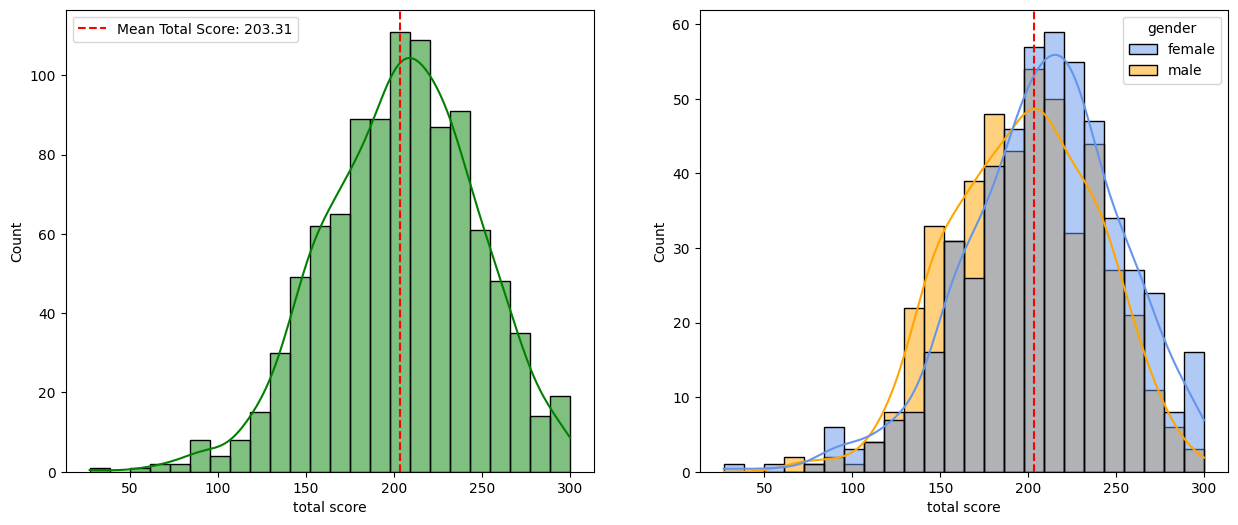

In [60]:
# get mean total score
mean_tscore = np.mean(df['total score'])

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(ax=axs[0], data=df, x='total score', kde=True, color='g')
axs[0].axvline(mean_tscore, color='r', linestyle='--', label=f'Mean Total Score: {mean_tscore:.2f}')
axs[0].legend()

sns.histplot(ax=axs[1], data=df, x='total score', kde=True, hue='gender', palette={'female': 'cornflowerblue', 'male': 'orange'})
axs[1].axvline(mean_tscore, color='r', linestyle='--', label=f'Mean Total Score: {mean_tscore:.2f}')

plt.show()

### 4.1.2 Visualize Average Score Distribution

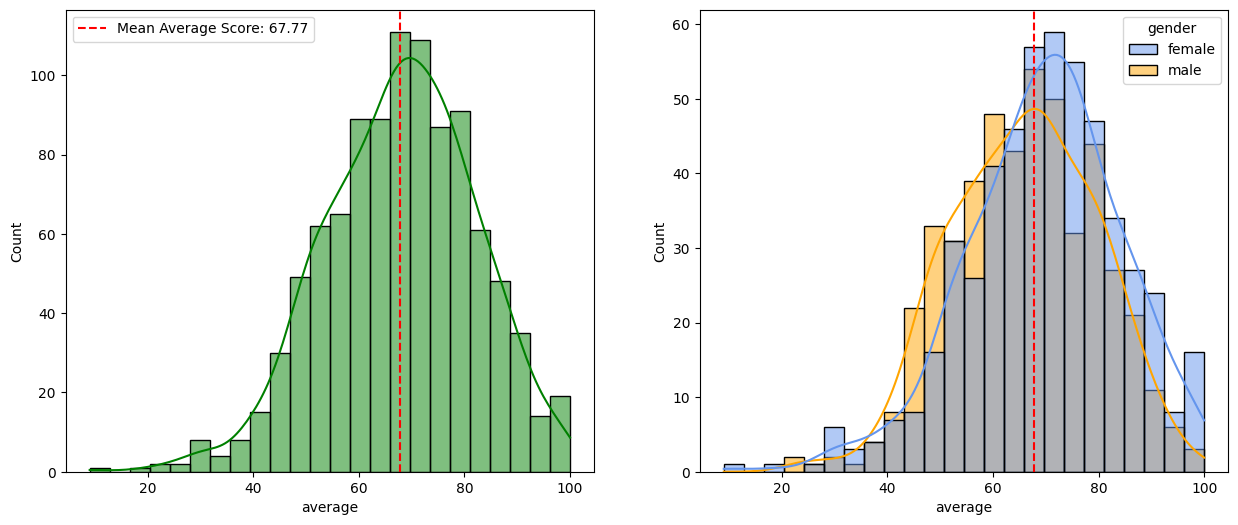

In [61]:
# calculate mean average score
mean_avg = np.mean(df['average'])

# left subplot
fix, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(ax=axs[0], data=df, x='average', kde=True, color='g')
axs[0].axvline(mean_avg, color='r', linestyle='--', label=f'Mean Average Score: {mean_avg:.2f}')
axs[0].legend()

# right subplot
sns.histplot(ax=axs[1], data=df, x='average', kde=True, hue='gender', palette={'female': 'cornflowerblue', 'male': 'orange'})
axs[1].axvline(mean_avg, color='r', linestyle='--', label=f'Mean Average Score: {mean_avg:.2f}')

plt.show()

### Insights

- female students tend to perform better than male

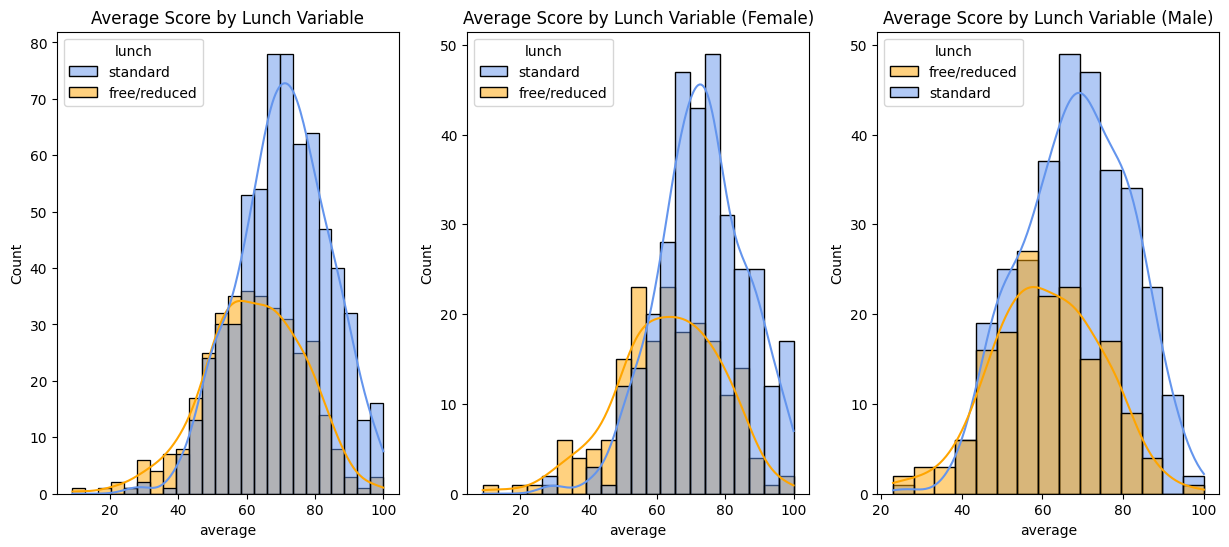

In [51]:
# visualize average by gender to confirm insight
# view in terms of lunch variable
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

sns.histplot(ax=axs[0], data=df, x='average', kde=True, hue='lunch', palette={'standard': 'cornflowerblue', 'free/reduced': 'orange'})
axs[0].set_title('Average Score by Lunch Variable')

sns.histplot(ax=axs[1], data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch', palette={'standard': 'cornflowerblue', 'free/reduced': 'orange'})
axs[1].set_title('Average Score by Lunch Variable (Female)')

sns.histplot(ax=axs[2], data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch', palette={'standard': 'cornflowerblue', 'free/reduced': 'orange'})
axs[2].set_title('Average Score by Lunch Variable (Male)')

plt.show()

### Insights

- standard lunch helps students perform well during their tests (for both male and female students)


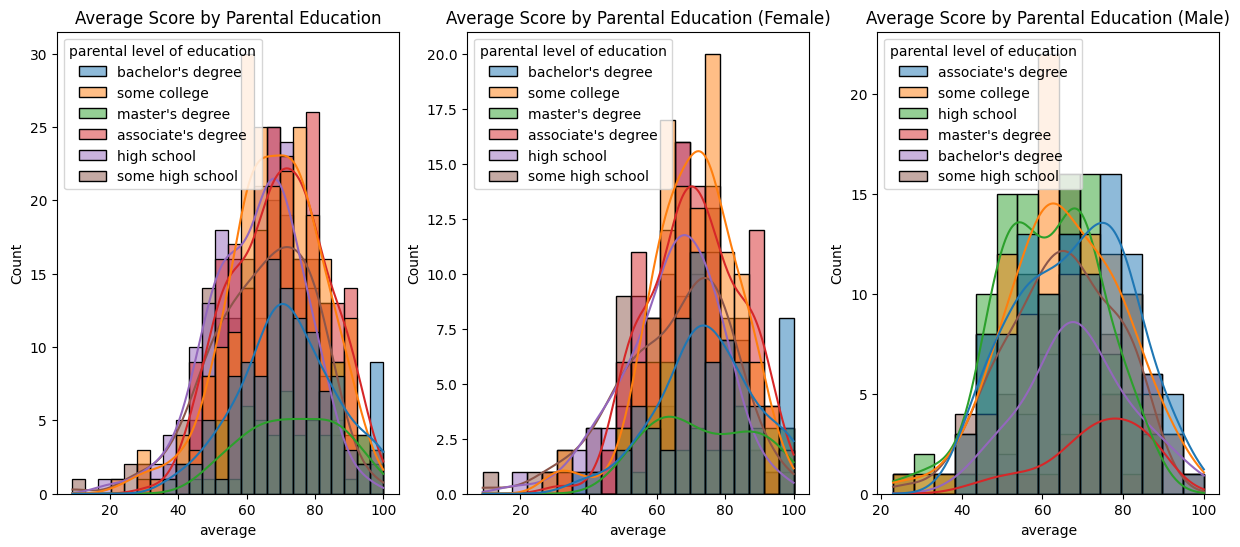

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
sns.histplot(ax=axs[0], data=df, x='average', kde=True, hue='parental level of education')
axs[0].set_title('Average Score by Parental Education')

sns.histplot(ax=axs[1], data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')
axs[1].set_title('Average Score by Parental Education (Female)')

sns.histplot(ax=axs[2], data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')
axs[2].set_title('Average Score by Parental Education (Male)')

plt.show()

### Insights

- in general, a parent's level of education has little impact on a child's success during an exam
- in the second plot we see little correlation between a parent's level of education and the success of a female child
- in the third plot we see that parents with an associate's degree or a bachelor's degree tends to correlate with the success of a male child

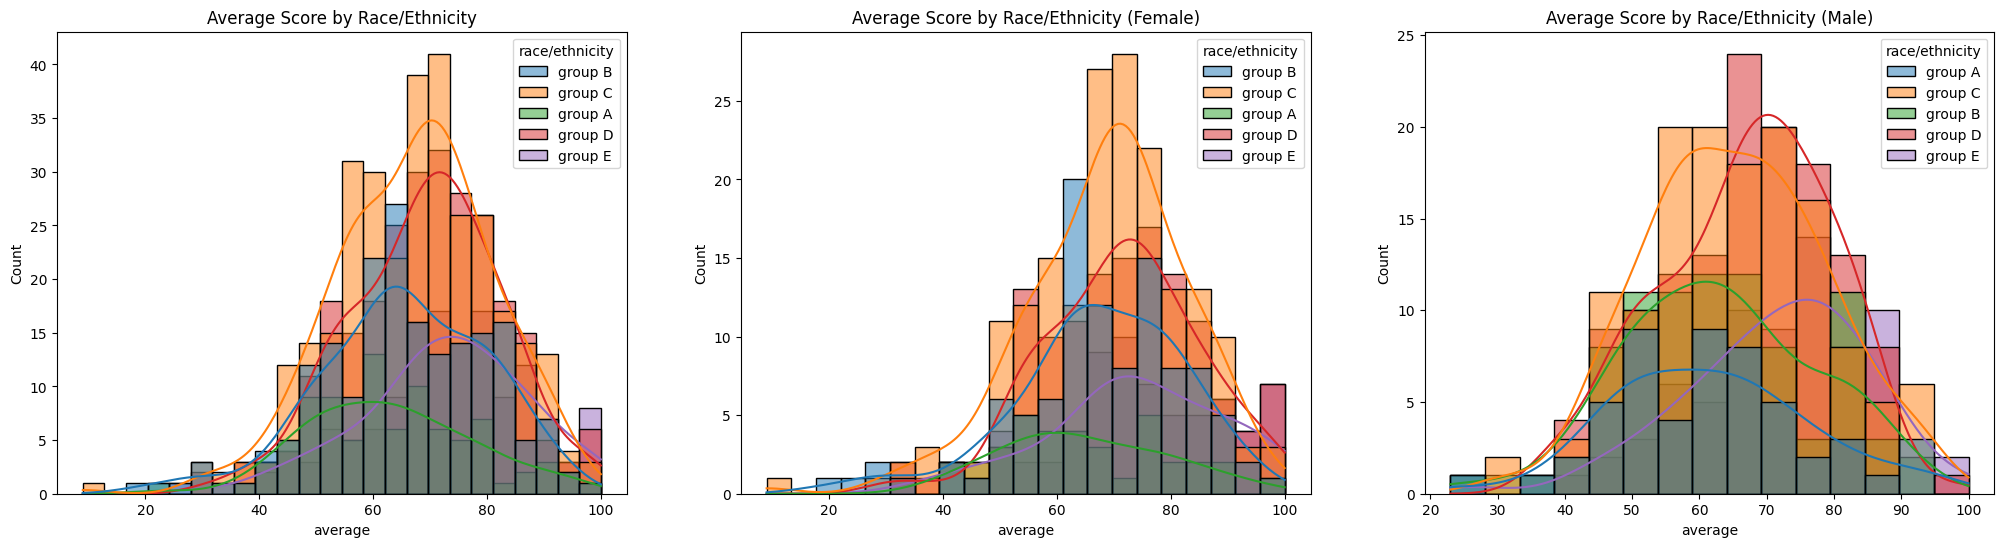

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(ax=axs[0], data=df, x='average', kde=True, hue='race/ethnicity')
axs[0].set_title('Average Score by Race/Ethnicity')

sns.histplot(ax=axs[1], data=df[df.gender == 'female'], x='average', kde=True, hue='race/ethnicity')
axs[1].set_title('Average Score by Race/Ethnicity (Female)')

sns.histplot(ax=axs[2], data=df[df.gender == 'male'], x='average', kde=True, hue='race/ethnicity')
axs[2].set_title('Average Score by Race/Ethnicity (Male)')

plt.show()

### Insights

- across the board, students in group A and group B tend to perform worst on their exams

### 4.2 Maximum Score of Students in All Three Subjects Using Violin Plots

**Violin Plot:** Violin plots combine aspects of both box plots and density plots, showing data distribution and probability density. It's beneficial for comparing distributions between multiple groups, highlighting variations and patterns in the data.

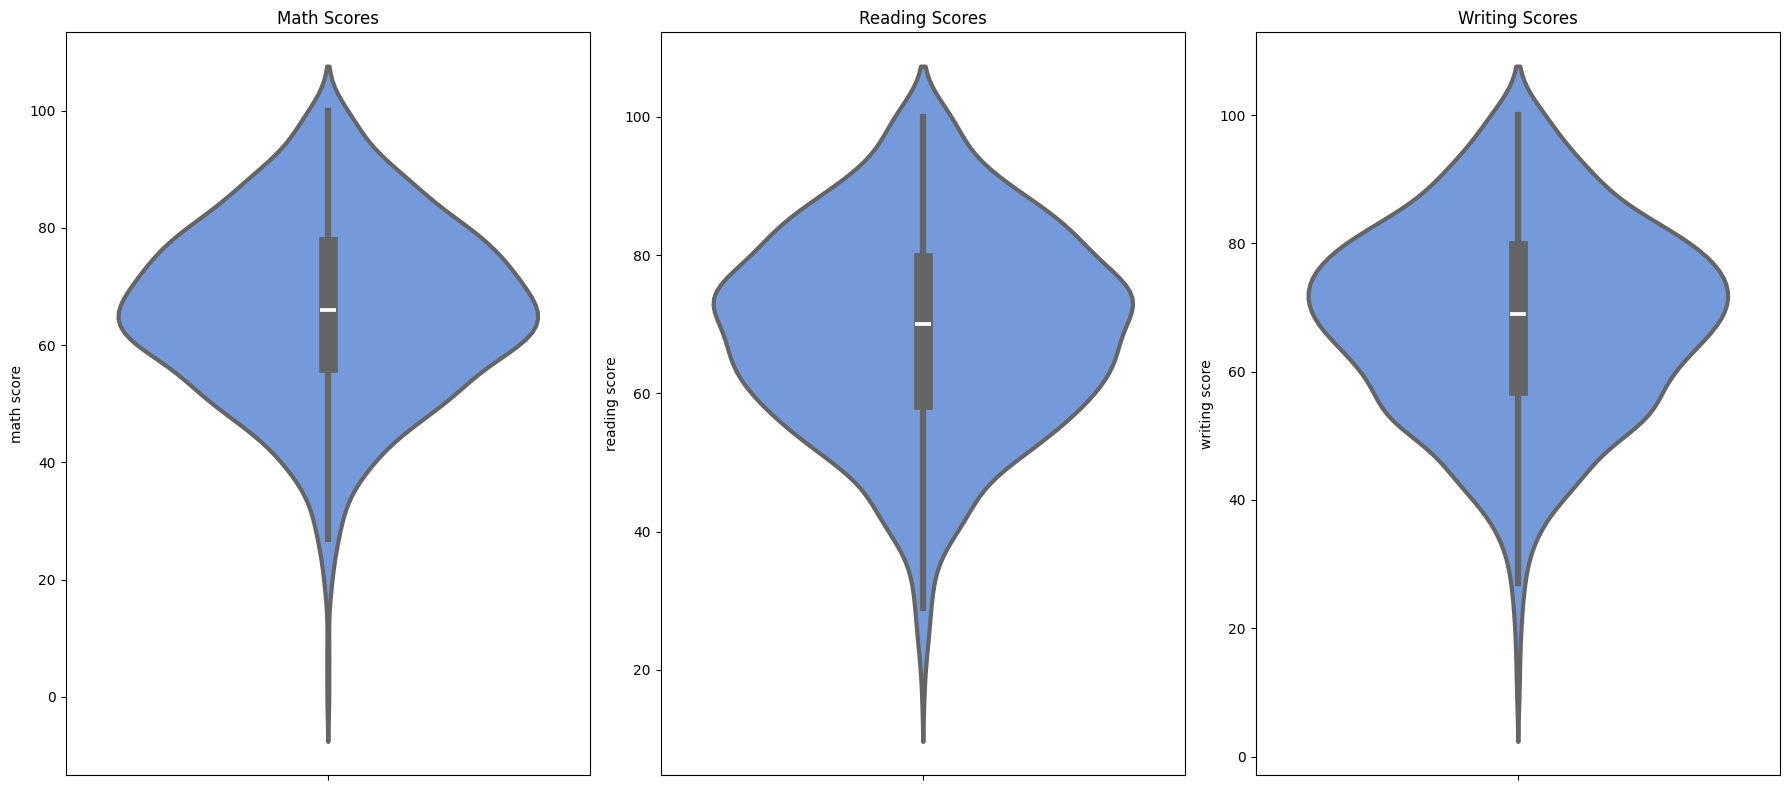

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

sns.violinplot(ax=axs[0], y='math score', data=df, color='cornflowerblue', linewidth=3)
axs[0].set_title('Math Scores')

sns.violinplot(ax=axs[1], y='reading score', data=df, color='cornflowerblue', linewidth=3)
axs[1].set_title('Reading Scores')

sns.violinplot(ax=axs[2], y='writing score', data=df, color='cornflowerblue', linewidth=3)
axs[2].set_title('Writing Scores')

plt.tight_layout()
plt.show()

### Insights

- the average math score is between 60 and 80
- the average reading score is less concentrated, between 50 and 80
- the average writing score is also less concentrated, between 50 and 80

### 4.3 Multivariate Analysis Using Pie Charts

**Multivariate Analysis:** Multivariate analysis involves looking at multiple variable simultaneously to understand relationships and patterns within the data. It helps in identifying correlations, detecting outliers, and making complex predictions.

**Pie Charts:** Pie charts display categories in a dataset, making them easy to understand and visually appealing for quick comparisons.

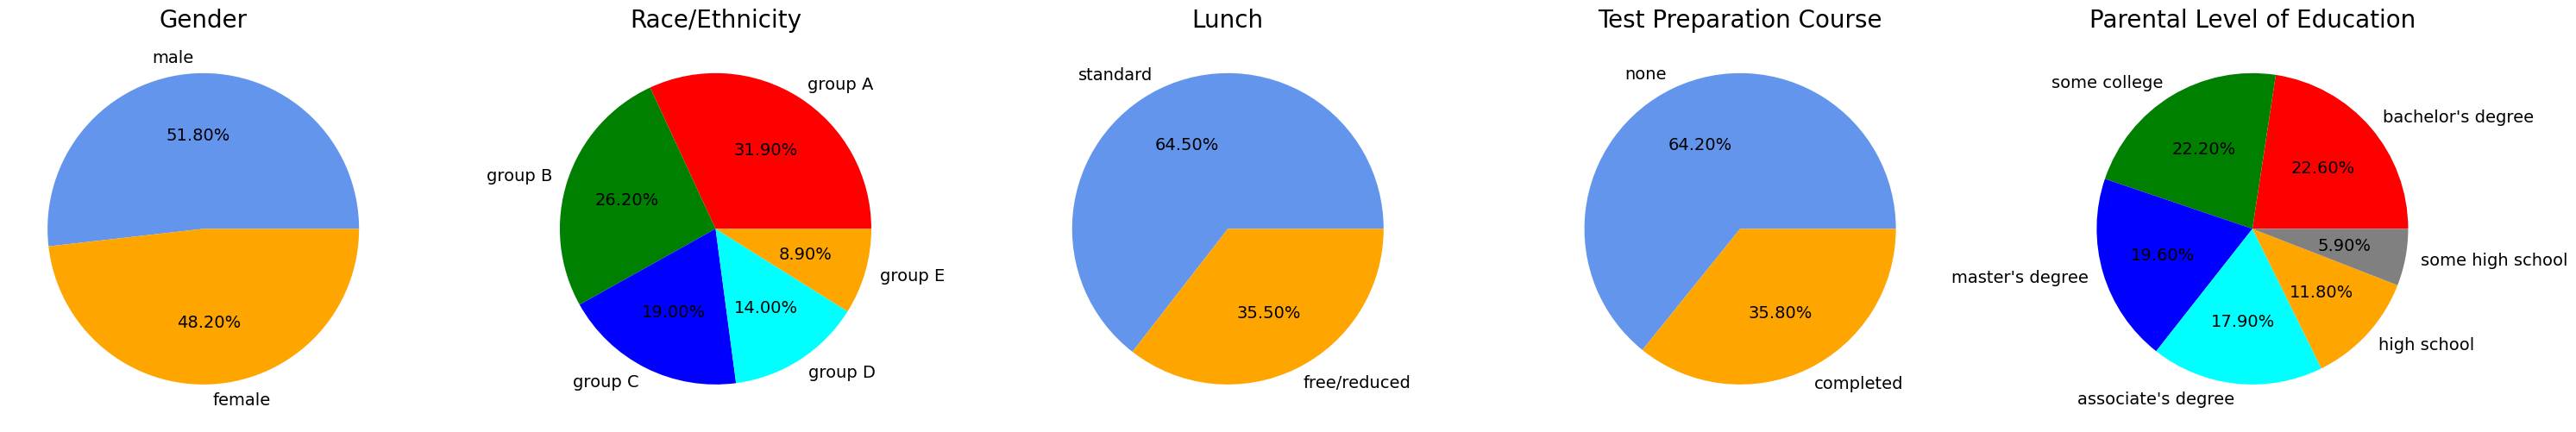

In [76]:
fig, axs = plt.subplots(1, 5, figsize=(30, 15))

textprops = {'fontsize': 14}

# first pie chart for gender
size = df['gender'].value_counts()
labels = ['male', 'female']
colors = ['cornflowerblue', 'orange']

axs[0].pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops=textprops)
axs[0].set_title('Gender', fontsize=20)
axs[0].axis('off')

# second pie chart for race/ethnicity
size = df['race/ethnicity'].value_counts()
labels = ['group A', 'group B', 'group C', 'group D', 'group E']
colors = ['red', 'green', 'blue', 'cyan', 'orange']

axs[1].pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops=textprops)
axs[1].set_title('Race/Ethnicity', fontsize=20)
axs[1].axis('off')

# third pie chart for lunch
size = df['lunch'].value_counts()
labels = ['standard', 'free/reduced']
colors = ['cornflowerblue', 'orange']

axs[2].pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops=textprops)
axs[2].set_title('Lunch', fontsize=20)
axs[2].axis('off')

# fourth pie chart for test prep course
size = df['test preparation course'].value_counts()
labels = ['none', 'completed']
colors = ['cornflowerblue', 'orange']

axs[3].pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops=textprops)
axs[3].set_title('Test Preparation Course', fontsize=20)
axs[3].axis('off')

# fifth pie chart for parental education
size = df['parental level of education'].value_counts()
labels = ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

axs[4].pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops=textprops)
axs[4].set_title('Parental Level of Education', fontsize=20)
axs[4].axis('off')

plt.tight_layout()
plt.show()

### Insights

- number of male and female students are nearly equal
- the most students are in race/ethnicity group A, followed by group B
- more students have standard lunch
- more students do not complete a test preparation course
- the most students have parents with a Bachelor's Degree, followed closely by some degree of college

### 4.4 Feature Wise Visualization
### 4.4.1 Gender Column

In this section we will analyze the distribution of gender and determine if gender has had any impact on students' performance

### Univariate Analysis of Gender

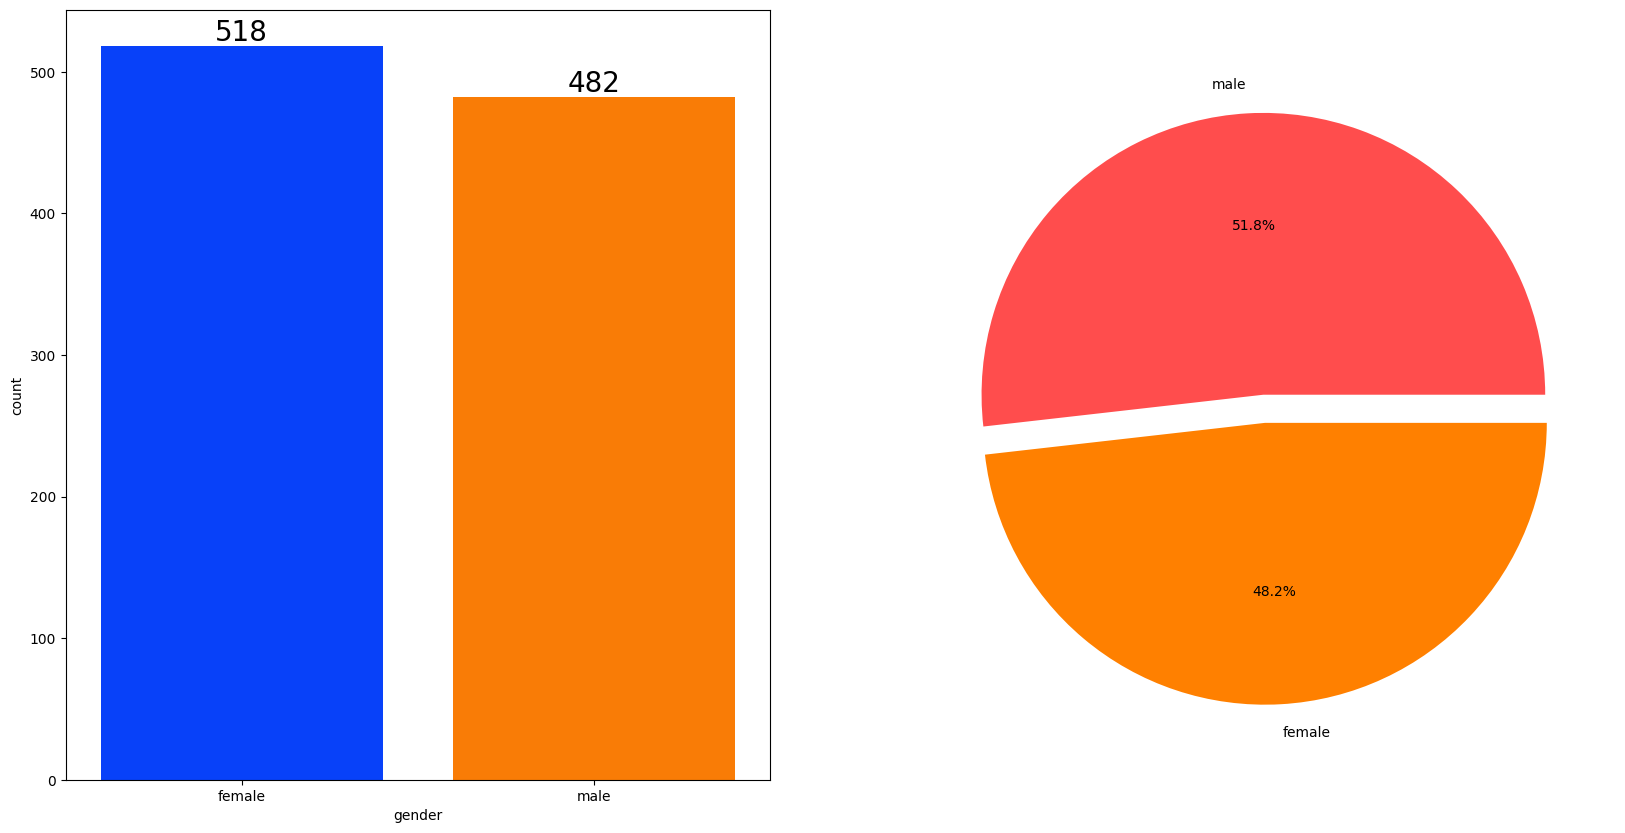

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(ax=axs[0], data=df, x='gender', palette='bright', saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['male', 'female'], explode=[0, 0.1], autopct='%.1f%%', shadow=False, colors=['#ff4d4d','#ff8000'])

plt.show()

### Insights

- gender has balanced data, with female students at 48.2% of the population (482 total) and male students making up 51.8% of the population (518 total)

### Bivariate Analysis

Is gender impacting students' performance?

In [90]:
score_columns = ['math score', 'reading score', 'writing score']
gender_group = df.groupby('gender')[score_columns].mean()

gender_group

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203
